In [75]:
from pathlib import Path
gpucb_1 = Path('/home/ubuntu/RL-Workflow-Search/logs/gpucb_maze_fixed_MainProcess_pid1371453_20251107_044059/updates.csv')
gpucb_2 = Path('/home/ubuntu/RL-Workflow-Search/logs/gpucb_maze_fixed_MainProcess_pid715607_20251105_221323/updates.csv')
gpucb_3 = Path('/home/ubuntu/RL-Workflow-Search/logs/gpucb_maze_fixed_MainProcess_pid715693_20251105_221328/updates.csv')
ppo_baseline1 = Path('/home/ubuntu/RL-Workflow-Search/logs/ppo_baseline_maze_mp_20251106_190240/updates.csv')
ppo_baseline2 = Path('/home/ubuntu/RL-Workflow-Search/logs/ppo_baseline_maze_mp_20251106_190243/updates.csv')
ppo_baseline3 = Path('/home/ubuntu/RL-Workflow-Search/logs/ppo_baseline_maze_mp_20251106_190245/updates.csv')
hrl_baseline1 = Path('/home/ubuntu/RL-Workflow-Search/logs/hrl_baseline_maze_20251107_060959/updates.csv')
hrl_baseline2 = Path('/home/ubuntu/RL-Workflow-Search/logs/hrl_baseline_maze_20251107_061113/updates.csv')
hrl_baseline3 = Path('/home/ubuntu/RL-Workflow-Search/logs/hrl_baseline_maze_20251107_061116/updates.csv')
sac_baseline1 = Path('/home/ubuntu/RL-Workflow-Search/logs/parallel_sac_maze_20251107_035006/training_log.csv')
sac_baseline2 = Path('/home/ubuntu/RL-Workflow-Search/logs/parallel_sac_maze_20251107_035010/training_log.csv')
sac_baseline3 = Path('/home/ubuntu/RL-Workflow-Search/logs/parallel_sac_maze_20251107_035021/training_log.csv')


Loaded GP-UCB run 1: 2183 updates
Loaded GP-UCB run 2: 9999 updates
Loaded GP-UCB run 3: 9999 updates


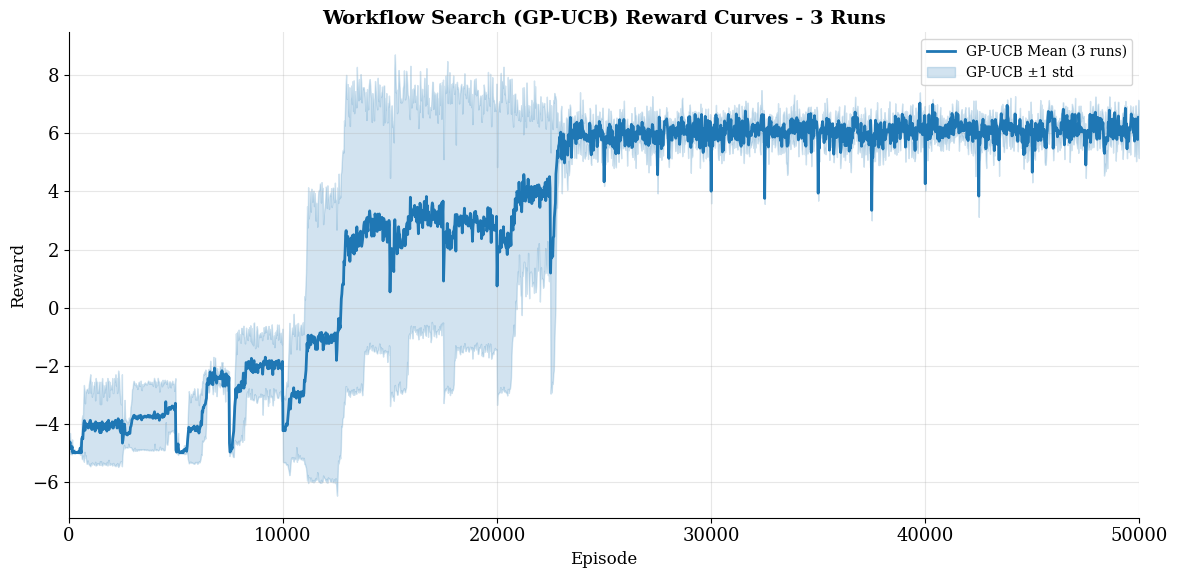


Plotted 3 GP-UCB runs up to 50000 episodes


In [76]:
# Plot Workflow Search (GP-UCB) Reward Curves - 3 Runs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load all 3 GP-UCB runs
gpucb_paths = [gpucb_1, gpucb_2, gpucb_3]
gpucb_dfs = []

for i, path in enumerate(gpucb_paths):
    if path.exists():
        df = pd.read_csv(path)
        # Normalize column names
        if 'mean_env_return' not in df.columns:
            if 'mean_env_ep_return' in df.columns:
                df = df.rename(columns={'mean_env_ep_return': 'mean_env_return'})
            elif 'mean_return' in df.columns:
                df = df.rename(columns={'mean_return': 'mean_env_return'})
        
        # Convert to numeric
        df['update'] = pd.to_numeric(df['update'], errors='coerce')
        df['mean_env_return'] = pd.to_numeric(df['mean_env_return'], errors='coerce')
        
        # Create total_update column (cumulative episodes)
        if 'workflow' in df.columns:
            df['total_update'] = np.arange(len(df))
        else:
            df['total_update'] = df['update'] if 'update' in df.columns else np.arange(len(df))
        
        # Convert to episodes (assuming 25 parallel envs per update)
        df['episode'] = df['total_update'] * 25
        
        gpucb_dfs.append(df)
        print(f"Loaded GP-UCB run {i+1}: {len(df)} updates")
    else:
        print(f"Warning: Path {i+1} does not exist: {path}")

# Align all runs to the same episode range
if gpucb_dfs:
    min_episodes = min(len(df) for df in gpucb_dfs) * 25
    max_episodes = min(50000, min_episodes)  # Limit to 50k episodes to match workflow search
    
    # Create episode grid for interpolation
    episode_grid = np.arange(0, max_episodes, 25)  # Every 25 episodes (1 update)
    
    # Interpolate all runs to the same grid
    aligned_rewards = []
    for df in gpucb_dfs:
        df_episodes = df['episode'].values[:len(df)]
        df_rewards = df['mean_env_return'].values[:len(df)]
        
        # Interpolate to common grid
        aligned = np.interp(episode_grid, df_episodes, df_rewards, 
                           left=np.nan, right=np.nan)
        aligned_rewards.append(aligned)
    
    # Compute mean and std across runs
    aligned_rewards = np.array(aligned_rewards)
    mean_rewards = np.nanmean(aligned_rewards, axis=0)
    std_rewards = np.nanstd(aligned_rewards, axis=0)
    
    # Plot - only mean and variance
    plt.figure(figsize=(12, 6))
    
    # Plot mean with confidence interval (variance)
    valid_mask = ~np.isnan(mean_rewards)
    plt.plot(episode_grid[valid_mask], mean_rewards[valid_mask], 
            linewidth=2, color='C0', label='GP-UCB Mean (3 runs)')
    plt.fill_between(episode_grid[valid_mask], 
                     mean_rewards[valid_mask] - std_rewards[valid_mask],
                     mean_rewards[valid_mask] + std_rewards[valid_mask],
                     alpha=0.2, color='C0', label='GP-UCB ±1 std')
    
    plt.xlabel('Episode', fontsize=12)
    plt.ylabel('Reward', fontsize=12)
    plt.title('Workflow Search (GP-UCB) Reward Curves - 3 Runs', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.xlim(0, max_episodes)
    plt.tight_layout()
    plt.show()
    
    print(f"\nPlotted {len(gpucb_dfs)} GP-UCB runs up to {max_episodes} episodes")
else:
    print("No GP-UCB data found to plot")


Loading GP-UCB (Workflow Search)...
  Loaded GP-UCB run 1: 2183 updates
  Loaded GP-UCB run 2: 9999 updates
  Loaded GP-UCB run 3: 9999 updates

Loading PPO Baseline...
  Loaded PPO run 1: 2000 updates
  Loaded PPO run 2: 2000 updates
  Loaded PPO run 3: 2000 updates
  Loaded HRL run 1: 2000 updates
  Loaded HRL run 2: 2000 updates
  Loaded HRL run 3: 2000 updates

Loading SAC Baseline...
  Loaded SAC run 1: 250 updates
  Loaded SAC run 2: 250 updates
  Loaded SAC run 3: 250 updates

Checking data length for each method:
  GP-UCB: 50000 episodes ✓
  PPO: 50000 episodes ✓
  HRL: 50000 episodes ✓
  SAC: 50000 episodes ✓


/tmp/ipykernel_2648218/2703291591.py:88: RuntimeWarning: Mean of empty slice
  mean_rewards = np.nanmean(aligned_rewards, axis=0)
/home/ubuntu/miniconda3/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_2648218/2703291591.py:88: RuntimeWarning: Mean of empty slice
  mean_rewards = np.nanmean(aligned_rewards, axis=0)
/home/ubuntu/miniconda3/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_2648218/2703291591.py:88: RuntimeWarning: Mean of empty slice
  mean_rewards = np.nanmean(aligned_rewards, axis=0)
/home/ubuntu/miniconda3/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,



Saved figure to /home/ubuntu/RL-Workflow-Search/notebooks/figures/gridworld_performance_comparison.pdf


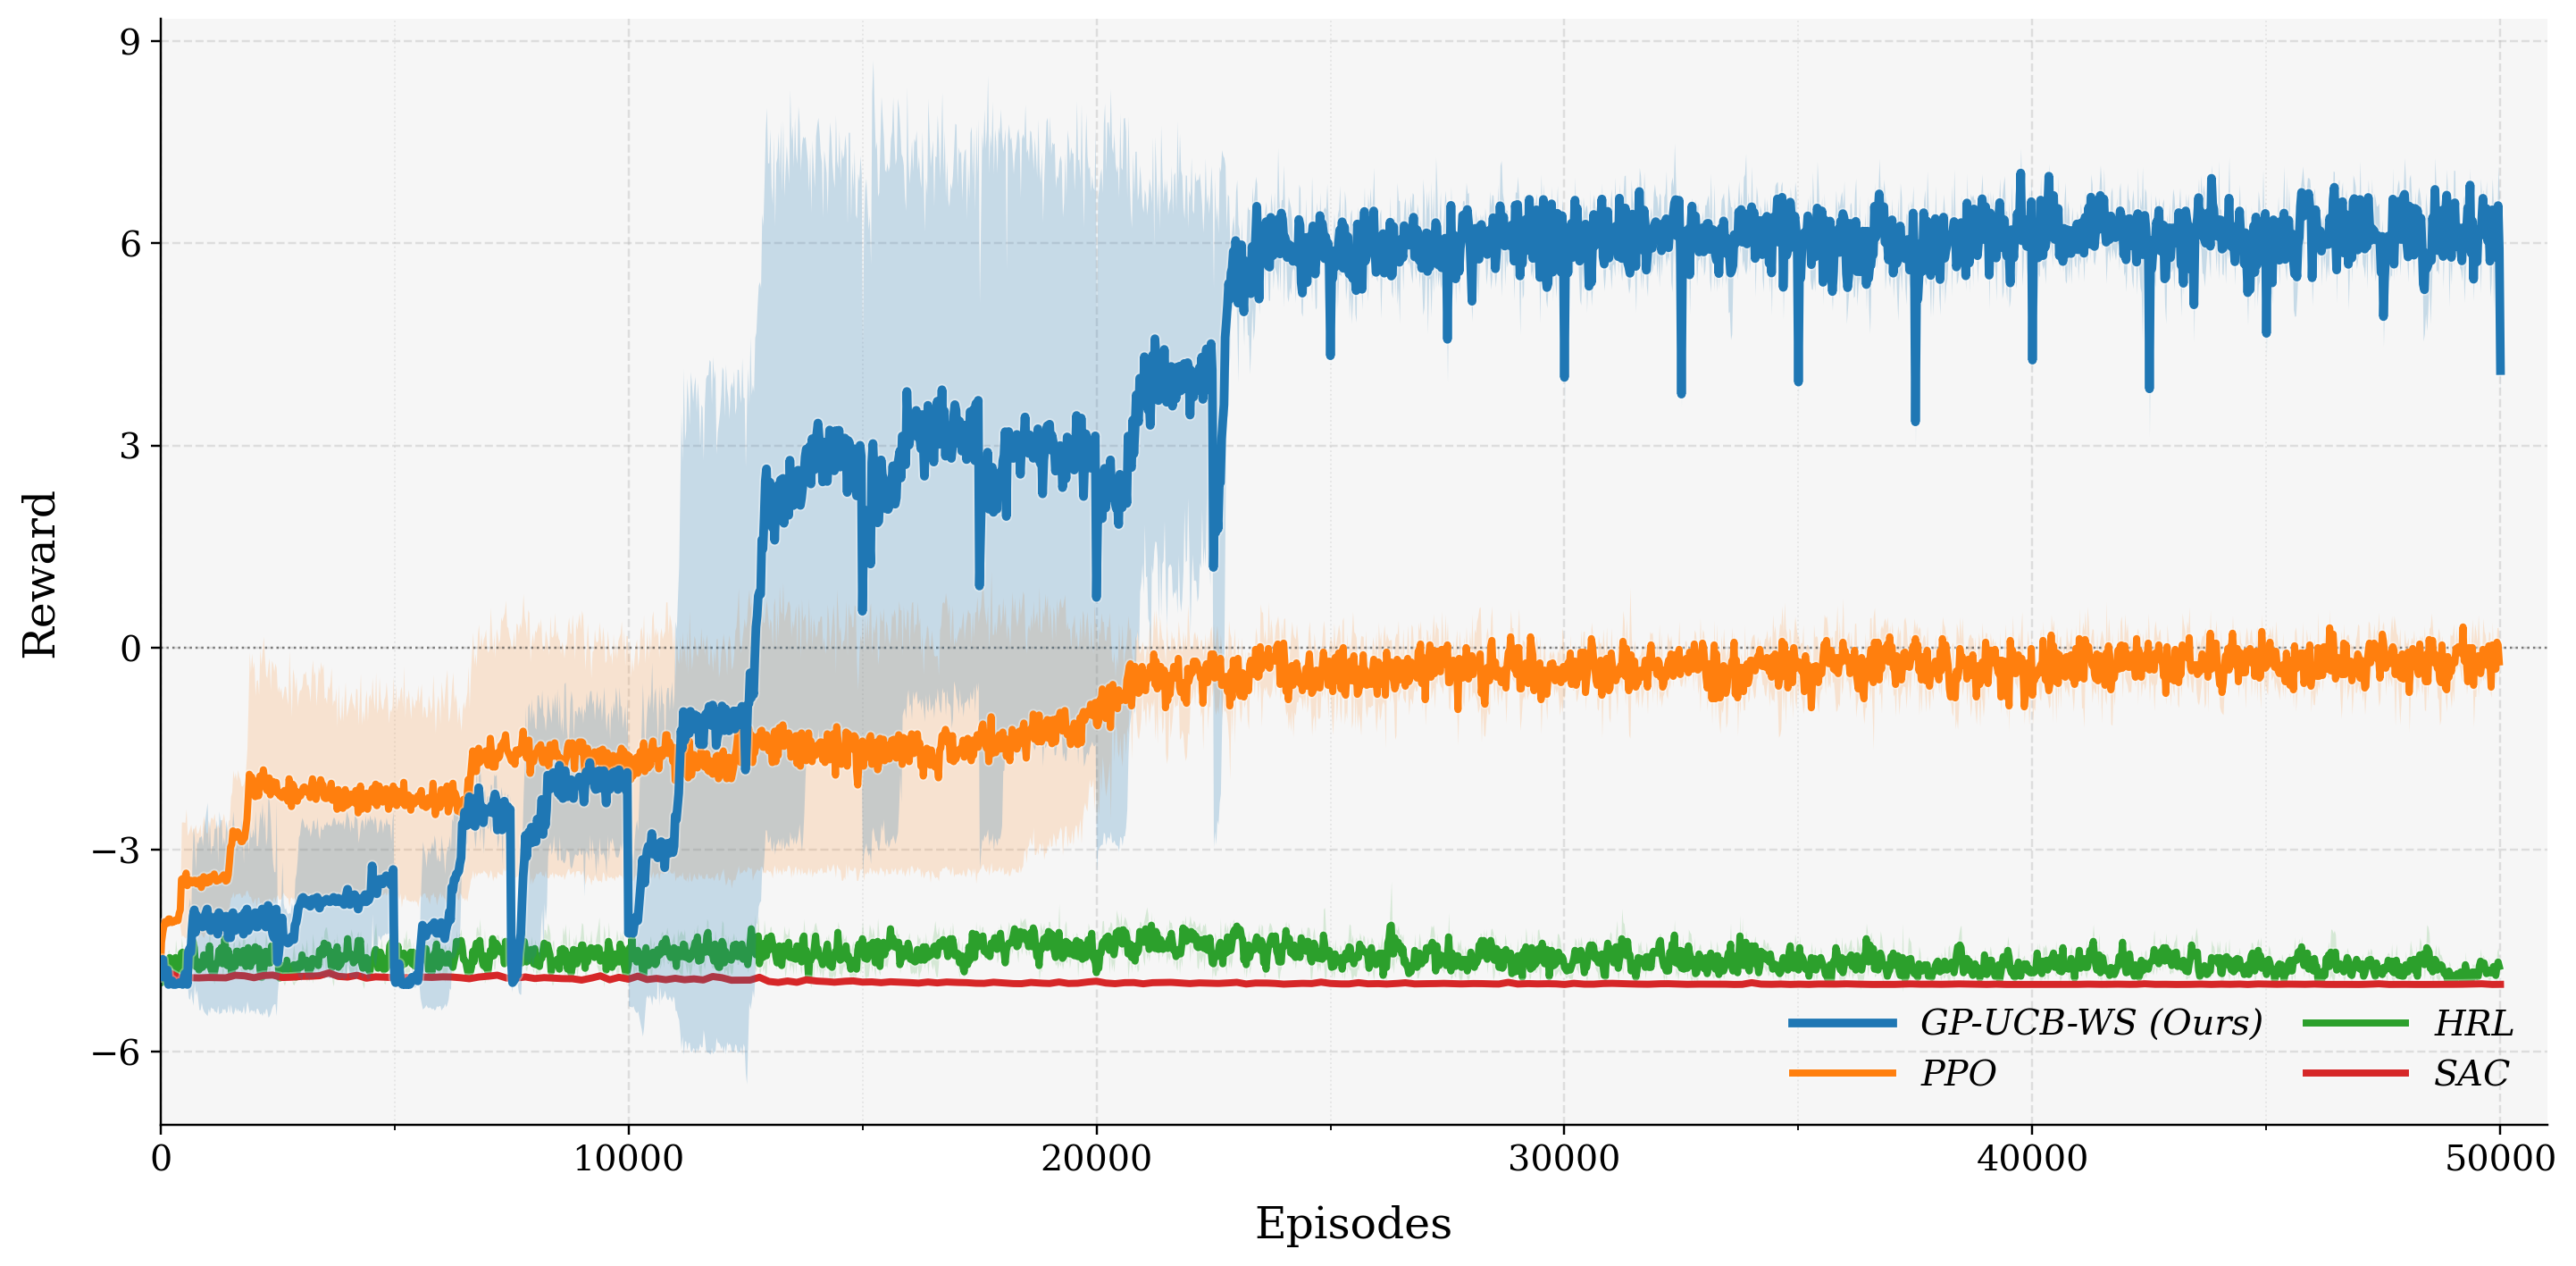


Plotted all methods up to 50000 episodes


In [77]:
# Plot All Methods Comparison - Mean and Variance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import patheffects
from pathlib import Path

# Publication-ready plotting defaults
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 20,
    "axes.titleweight": "bold",
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "grid.alpha": 0.25,
    "axes.spines.top": False,
    "axes.spines.right": False,
})

METHOD_STYLE = {
    "GP-UCB": {"color": "#1f77b4", "label": "GP-UCB-WS (Ours)", "linewidth": 3.2, "alpha": 0.22, "zorder": 4},
    "PPO":   {"color": "#ff7f0e", "label": "PPO",              "linewidth": 2.6, "alpha": 0.16, "zorder": 3},
    "HRL":   {"color": "#2ca02c", "label": "HRL",              "linewidth": 2.6, "alpha": 0.16, "zorder": 2},
    "SAC":   {"color": "#d62728", "label": "SAC",              "linewidth": 2.6, "alpha": 0.16, "zorder": 2},
}

def load_and_process_method(paths, method_name, num_envs=25):
    """Load and process a method's runs, return mean and std aligned to episode grid."""
    dfs = []

    for i, path in enumerate(paths):
        if path.exists():
            df = pd.read_csv(path)

            if "mean_env_return" not in df.columns:
                if "mean_env_ep_return" in df.columns:
                    df = df.rename(columns={"mean_env_ep_return": "mean_env_return"})
                elif "mean_return" in df.columns:
                    df = df.rename(columns={"mean_return": "mean_env_return"})
                elif "avg_reward" in df.columns:
                    df = df.rename(columns={"avg_reward": "mean_env_return"})

            df["mean_env_return"] = pd.to_numeric(df["mean_env_return"], errors="coerce")

            if "episodes" in df.columns:
                df["episode"] = pd.to_numeric(df["episodes"], errors="coerce")
            elif "workflow" in df.columns:
                df["total_update"] = np.arange(len(df))
                df["episode"] = df["total_update"] * num_envs
            else:
                df["total_update"] = df["update"] if "update" in df.columns else np.arange(len(df))
                df["episode"] = df["total_update"] * num_envs

            dfs.append(df)
            print(f"  Loaded {method_name} run {i + 1}: {len(df)} updates")
        else:
            print(f"  Warning: {method_name} path {i + 1} does not exist: {path}")

    if not dfs:
        return None, None, None

    max_episodes_list = []
    for df in dfs:
        if "episodes" in df.columns:
            max_ep = df["episode"].max() if "episode" in df.columns else df["episodes"].max()
        else:
            max_ep = len(df) * num_envs
        max_episodes_list.append(max_ep)

    min_episodes = min(max_episodes_list)
    max_episodes = min(50000, min_episodes)

    episode_grid = np.arange(0, max_episodes + 25, 25)

    aligned_rewards = []
    for df in dfs:
        df_episodes = df["episode"].values[: len(df)]
        df_rewards = df["mean_env_return"].values[: len(df)]
        aligned = np.interp(episode_grid, df_episodes, df_rewards, left=np.nan, right=np.nan)
        aligned_rewards.append(aligned)

    aligned_rewards = np.array(aligned_rewards)
    mean_rewards = np.nanmean(aligned_rewards, axis=0)
    std_rewards = np.nanstd(aligned_rewards, axis=0)

    return episode_grid, mean_rewards, std_rewards

print("Loading GP-UCB (Workflow Search)...")
gpucb_grid, gpucb_mean, gpucb_std = load_and_process_method(
    [gpucb_1, gpucb_2, gpucb_3], "GP-UCB", num_envs=25
)

print("\nLoading PPO Baseline...")
ppo_grid, ppo_mean, ppo_std = load_and_process_method(
    [ppo_baseline1, ppo_baseline2, ppo_baseline3], "PPO", num_envs=25
)
hrl_grid, hrl_mean, hrl_std = load_and_process_method(
    [hrl_baseline1, hrl_baseline2, hrl_baseline3], "HRL", num_envs=25
)

print("\nLoading SAC Baseline...")
sac_grid, sac_mean, sac_std = load_and_process_method(
    [sac_baseline1, sac_baseline2, sac_baseline3], "SAC", num_envs=25
)

fig, ax = plt.subplots(figsize=(13.5, 6.8), dpi=220)
fig.patch.set_facecolor("white")
ax.set_facecolor("#f6f6f6")

method_data = [
    ("GP-UCB", gpucb_grid, gpucb_mean, gpucb_std),
    ("PPO", ppo_grid, ppo_mean, ppo_std),
    ("HRL", hrl_grid, hrl_mean, hrl_std),
    ("SAC", sac_grid, sac_mean, sac_std),
]

any_plotted = False
print("\nChecking data length for each method:")
for method_name, grid, mean, std in method_data:
    if grid is None or mean is None:
        print(f"  {method_name}: no data")
        continue

    available_ep = grid[-1] if len(grid) > 0 else 0
    status = "✓" if available_ep >= 50000 else "✗ (insufficient)"
    print(f"  {method_name}: {available_ep} episodes {status}")

    plot_ep = min(50000, available_ep)
    valid_mask = ~np.isnan(mean) & (grid <= plot_ep)
    style = METHOD_STYLE[method_name]

    if valid_mask.sum() == 0:
        continue

    line, = ax.plot(
        grid[valid_mask],
        mean[valid_mask],
        color=style["color"],
        linewidth=style["linewidth"],
        label=style["label"],
        zorder=style["zorder"],
    )
    line.set_path_effects([
        patheffects.Stroke(linewidth=style["linewidth"] + 1.2, foreground="white", alpha=0.35),
        patheffects.Normal(),
    ])

    ax.fill_between(
        grid[valid_mask],
        mean[valid_mask] - std[valid_mask],
        mean[valid_mask] + std[valid_mask],
        color=style["color"],
        alpha=style["alpha"],
        linewidth=0,
        zorder=style["zorder"] - 1,
    )
    any_plotted = True

if any_plotted:
    ax.set_xlabel("Episodes", labelpad=10)
    ax.set_ylabel("Reward", labelpad=10)
    #ax.set_title("Gridworld with Obstacles: Performance Over Training")

    ax.set_xlim(0, 51000)
    ax.set_xticks(np.arange(0, 50001, 10000))
    ax.set_xticks(np.arange(0, 50001, 5000), minor=True)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=6))
    ax.grid(which="major", axis="both", linestyle="--", linewidth=0.8, alpha=0.35)
    ax.grid(which="minor", axis="x", linestyle=":", linewidth=0.6, alpha=0.25)

    y_mins = []
    y_maxs = []
    for _, grid, mean, std in method_data:
        if grid is None or mean is None:
            continue
        valid_mask = ~np.isnan(mean)
        if valid_mask.sum() == 0:
            continue
        y_mins.append(np.nanmin(mean[valid_mask] - std[valid_mask]))
        y_maxs.append(np.nanmax(mean[valid_mask] + std[valid_mask]))
    if y_mins and y_maxs:
        lower = min(y_mins)
        upper = max(y_maxs)
        padding = 0.04 * (upper - lower)
        ax.set_ylim(lower - padding, upper + padding)

    ax.axhline(0, color="#444444", linewidth=0.8, linestyle=":", alpha=0.65)

    legend = ax.legend(frameon=False, loc="lower right", ncol=2, columnspacing=1.2, handlelength=2.8)
    for text in legend.get_texts():
        text.set_fontstyle("italic")

    #fig.text(0.01, 0.02, "Mean ± 1 std. over 3 runs per method", fontsize=12, alpha=0.85)

    fig.tight_layout(rect=[0, 0.02, 0.99, 1])

    output_dir = Path.cwd() / "figures"
    output_dir.mkdir(parents=True, exist_ok=True)
    pdf_path = output_dir / "gridworld_performance_comparison.pdf"
    fig.savefig(pdf_path, bbox_inches="tight")
    print(f"\nSaved figure to {pdf_path.resolve()}")

    plt.show()
    print("\nPlotted all methods up to 50000 episodes")
else:
    print("No data found to plot")


In [78]:
# Plot PPO Baseline vs GP-UCB Results

import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Inline plots
%matplotlib inline

BASELINE_CSV = Path('/home/ubuntu/RL-Workflow-Search/logs/ppo_baseline_diagonal_mp_20250828_164323/updates.csv')
BASELINE_CSV = Path('/home/ubuntu/RL-Workflow-Search/logs/maze_baseline_1k_20251031_112117/updates.csv')
#BASELINE_CSV = Path('/home/ubuntu/RL-Workflow-Search/logs/baseline_regions_20251027_113406/updates.csv')
GPUCB_CSV = Path('/home/ubuntu/RL-Workflow-Search/logs/gpucb_diagonal_MainProcess_pid3273252_20250902_041740/updates.csv')
GPUCB_CSV = Path('/home/ubuntu/RL-Workflow-Search/logs/gpucb_diagonal_revisit_MainProcess_pid3176897_20250904_084854/updates.csv')
GPUCB_CSV = Path('/home/ubuntu/RL-Workflow-Search/logs/gpucb_diagonal_allowrevisit_MainProcess_pid4017383_20250922_002945/updates.csv')
GPUCB_CSV = Path('/home/ubuntu/RL-Workflow-Search/logs/adh_reward_run_MainProcess_pid1250882_20251027_052139/updates.csv')
GPUCB_CSV = Path('/home/ubuntu/RL-Workflow-Search/logs/maze_formal_MainProcess_pid188200_20251031_091451/updates.csv')

#GPUCB_CSV = Path('/home/ubuntu/RL-Workflow-Search/logs/regions_formal_MainProcess_pid1267167_20251027_064738/updates.csv')
assert BASELINE_CSV.exists(), f"Missing baseline CSV: {BASELINE_CSV}"
assert GPUCB_CSV.exists(), f"Missing GP-UCB CSV: {GPUCB_CSV}"

print('Baseline CSV:', BASELINE_CSV)
print('GP-UCB CSV   :', GPUCB_CSV)


Baseline CSV: /home/ubuntu/RL-Workflow-Search/logs/maze_baseline_1k_20251031_112117/updates.csv
GP-UCB CSV   : /home/ubuntu/RL-Workflow-Search/logs/maze_formal_MainProcess_pid188200_20251031_091451/updates.csv


In [79]:
# Load CSVs

def load_csv(path: Path) -> pd.DataFrame:
    df = pd.read_csv(path)
    # Normalize common column names across scripts
    # Baseline expected: update, mean_env_return, mean_adherence, avg_ep_len
    # GP-UCB expected: update, mean_env_return (EvalEnv canonical or rollout env-only), mean_adherence, avg_ep_len
    # Some scripts may save different headers; try to align
    rename_map = {}
    if 'mean_env_ep_return' in df.columns and 'mean_env_return' not in df.columns:
        rename_map['mean_env_ep_return'] = 'mean_env_return'
    if 'mean_return' in df.columns and 'mean_env_return' not in df.columns:
        rename_map['mean_return'] = 'mean_env_return'
    if 'episode_len_mean' in df.columns and 'avg_ep_len' not in df.columns:
        rename_map['episode_len_mean'] = 'avg_ep_len'
    if rename_map:
        df = df.rename(columns=rename_map)

    # Ensure required columns exist (fill with NaNs if missing)
    for col in ['update', 'mean_env_return', 'mean_adherence', 'avg_ep_len']:
        if col not in df.columns:
            df[col] = np.nan

    # Coerce numeric
    for col in ['update', 'mean_env_return', 'mean_adherence', 'avg_ep_len']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    return df

baseline_df = load_csv(BASELINE_CSV)
gpucb_df = load_csv(GPUCB_CSV)

baseline_df.head(), gpucb_df.head()


(   update  mean_env_return  mean_adherence  success_rate  policy_loss  \
 0       0             -4.0            0.25           0.0     0.037911   
 1       1             -5.0            0.00           0.0    -0.065970   
 2       2             -5.0            0.00           0.0    -0.032213   
 3       3             -4.0            0.25           0.0     0.003551   
 4       4             -4.0            0.25           0.0    -0.000864   
 
    value_loss   entropy  avg_ep_len  
 0    0.011495  1.367464         NaN  
 1    0.001331  1.327933         NaN  
 2    0.002000  1.285325         NaN  
 3    0.007449  1.308458         NaN  
 4    0.009419  1.332641         NaN  ,
   workflow  visit  update  total_update  mean_return_shaped  mean_env_return  \
 0  2-0-1-3      1       0             1          -21.039989            -8.00   
 1  2-0-1-3      1       1             2           -6.079990            -7.20   
 2  2-0-1-3      1       2             3            5.000010            -6.4

In [80]:
# Rolling helpers and cumulative update for GP-UCB

def add_rolling(df: pd.DataFrame, col: str, window: int = 25) -> pd.DataFrame:
    out = df.copy()
    if col in out.columns:
        out[f'{col}_roll'] = out[col].rolling(window=window, min_periods=max(3, window//5)).mean()
    return out

# For GP-UCB, convert per-workflow updates to a global cumulative update index
# Expect a 'workflow' column; if missing, infer single-workflow stream
if 'workflow' in gpucb_df.columns:
    # Ensure chronological order: by workflow appearance then within-workflow update
    gpucb_df = gpucb_df.copy()
    gpucb_df['__row_id__'] = np.arange(len(gpucb_df))
    # We assume the CSV is already in time order per training loop append
    gpucb_df['total_update'] = np.arange(len(gpucb_df))
else:
    gpucb_df['total_update'] = gpucb_df['update'] if 'update' in gpucb_df.columns else np.arange(len(gpucb_df))

baseline_df = add_rolling(baseline_df, 'mean_env_return')
baseline_df = add_rolling(baseline_df, 'mean_adherence')
baseline_df = add_rolling(baseline_df, 'avg_ep_len')

gpucb_df = add_rolling(gpucb_df, 'mean_env_return')
gpucb_df = add_rolling(gpucb_df, 'mean_adherence')
gpucb_df = add_rolling(gpucb_df, 'avg_ep_len')

baseline_df.tail(2), gpucb_df.tail(2)


(     update  mean_env_return  mean_adherence  success_rate  policy_loss  \
 998     998             -4.0            0.25           0.0     0.009091   
 999     999             -4.0            0.25           0.0     0.012572   
 
      value_loss   entropy  avg_ep_len  mean_env_return_roll  \
 998    0.010261  0.074126         NaN                 -4.08   
 999    0.010378  0.068674         NaN                 -4.08   
 
      mean_adherence_roll  avg_ep_len_roll  
 998                 0.23              NaN  
 999                 0.23              NaN  ,
      workflow  visit  update  total_update  mean_return_shaped  \
 8845  0-1-2-3   1148       4          8845          106.934056   
 8846  0-1-2-3   1148       5          8846          106.475430   
 
       mean_env_return  mean_adherence mode_seq  mode_frac  avg_ep_len  \
 8845         7.473784        0.966216  0 1 2 3   0.945946         NaN   
 8846         7.237714        0.957143  0 1 2 3   0.928571         NaN   
 
       __row_

In [81]:
s = pd.concat([gpucb_df['mean_env_return'].iloc[:1000],
               gpucb_df['mean_env_return'].iloc[4000:7000]])

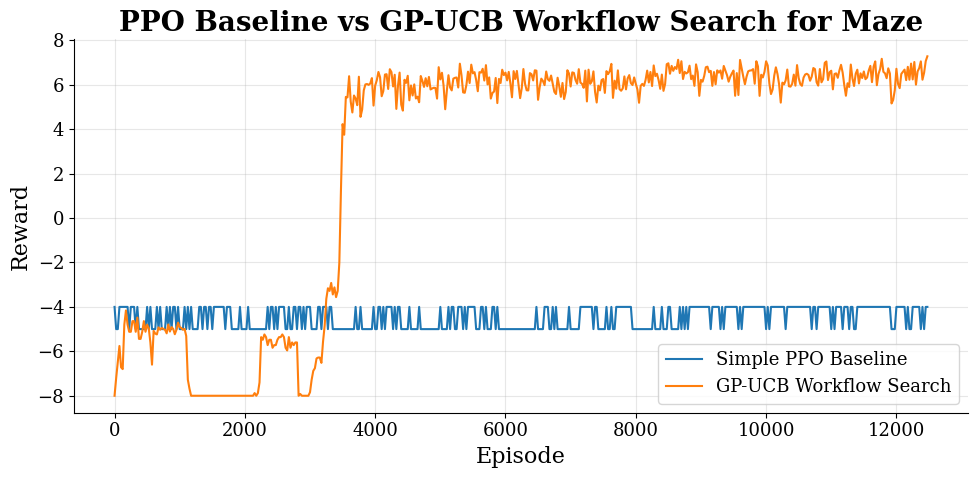

In [82]:
# Plot: Env-only reward vs total updates (baseline update vs GP-UCB total_update)

plt.figure(figsize=(10,5))
plt.plot(baseline_df['update'][:500]*25, baseline_df['mean_env_return'][:500], alpha=1, label='Simple PPO Baseline')
#if 'mean_env_return_roll' in baseline_df.columns:
    #plt.plot(baseline_df['update']*25, baseline_df['mean_env_return_roll'], label='Simple PPO Baseline')

plt.plot(gpucb_df['total_update'][:500]*25, gpucb_df['mean_env_return'][:500], alpha=1, label='GP-UCB Workflow Search')
#if 'mean_env_return_roll' in gpucb_df.columns:
    #plt.plot(gpucb_df['total_update']*25, gpucb_df['mean_env_return_roll'], label='GP-UCB Workflow Search')

plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('PPO Baseline vs GP-UCB Workflow Search for Maze')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


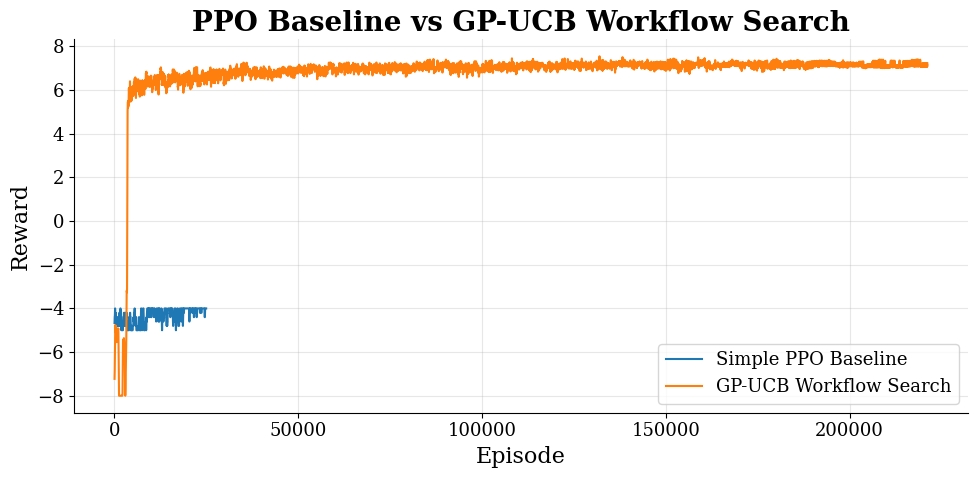

In [83]:
import matplotlib.pyplot as plt

# Set smoothing window (tune as needed, e.g. 10, 20, 50)
smooth_window = 5

plt.figure(figsize=(10, 5))

# Smooth baseline curve
baseline_x = baseline_df['update'][:6000]*25
baseline_y = baseline_df['mean_env_return'][:6000].rolling(smooth_window, min_periods=3).mean()
plt.plot(baseline_x, baseline_y, alpha=1, label='Simple PPO Baseline')

# Smooth GP-UCB curve
gpucb_x = gpucb_df['total_update'][:10000] * 25
gpucb_y = gpucb_df['mean_env_return'][:10000].rolling(smooth_window, min_periods=3).mean()
plt.plot(gpucb_x, gpucb_y, alpha=1, label='GP-UCB Workflow Search')

plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('PPO Baseline vs GP-UCB Workflow Search')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

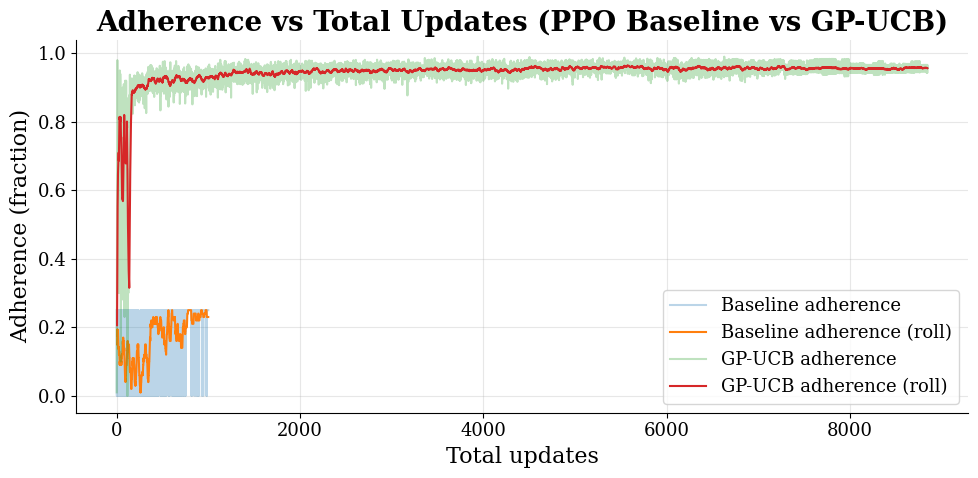

In [84]:
# Plot: Adherence vs total updates

plt.figure(figsize=(10,5))
plt.plot(baseline_df['update'], baseline_df['mean_adherence'], alpha=0.3, label='Baseline adherence')
if 'mean_adherence_roll' in baseline_df.columns:
    plt.plot(baseline_df['update'], baseline_df['mean_adherence_roll'], label='Baseline adherence (roll)')

plt.plot(gpucb_df['total_update'], gpucb_df['mean_adherence'], alpha=0.3, label='GP-UCB adherence')
if 'mean_adherence_roll' in gpucb_df.columns:
    plt.plot(gpucb_df['total_update'], gpucb_df['mean_adherence_roll'], label='GP-UCB adherence (roll)')

plt.xlabel('Total updates')
plt.ylabel('Adherence (fraction)')
plt.title('Adherence vs Total Updates (PPO Baseline vs GP-UCB)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


/tmp/ipykernel_2648218/4013428692.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', len(workflows))


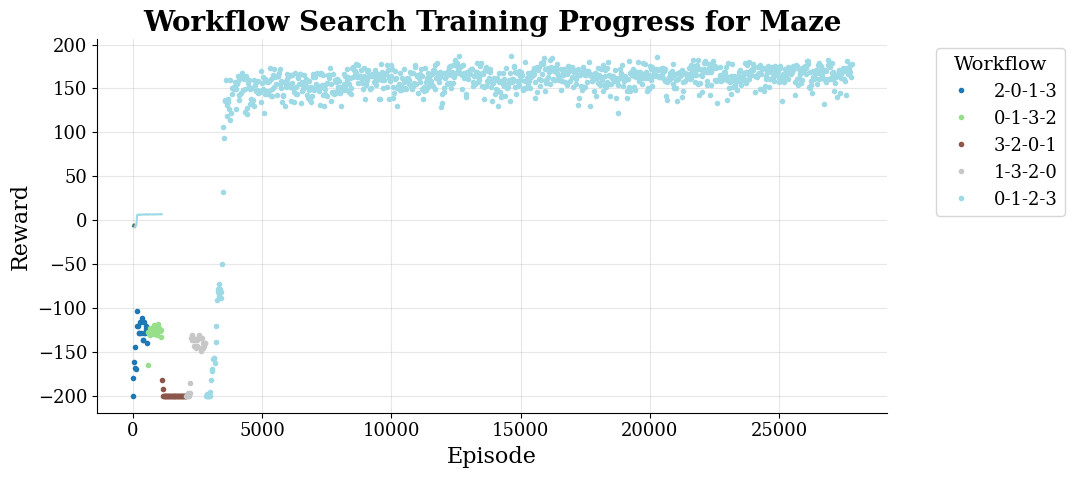

In [85]:
# Plot: GP-UCB env-only return vs total_update, colored by workflow

if 'workflow' not in gpucb_df.columns:
    print('No workflow column found in GP-UCB CSV; cannot color by workflow.')
else:
    # Build a color map per workflow string
    workflows = gpucb_df['workflow'].astype(str).unique()
    cmap = plt.cm.get_cmap('tab20', len(workflows))
    wf_to_color = {wf: cmap(i) for i, wf in enumerate(workflows)}

    plt.figure(figsize=(11,5))
    for wf in workflows:
        sub = gpucb_df[gpucb_df['workflow'].astype(str) == wf]
        plt.plot(sub['total_update'][:1000]*25, sub['mean_env_return'][:1000]*25, '.', color=wf_to_color[wf], alpha=1, label=wf)
        # Optional: a light rolling line per workflow
        if 'mean_env_return_roll' in sub.columns:
            plt.plot(sub['total_update'][:1000], sub['mean_env_return_roll'][:1000], color=wf_to_color[wf], alpha=1)

    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Workflow Search Training Progress for Maze')
    plt.legend(title='Workflow', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [ ]:
# GP-UCB (revisit) path
NEW_GPUCB_CSV = Path('/home/ubuntu/RL-Workflow-Search/logs/gpucb_diagonal_revisit_MainProcess_pid2579176_20250904_055522/updates.csv')
assert NEW_GPUCB_CSV.exists(), f"Missing GP-UCB revisit CSV: {NEW_GPUCB_CSV}"
print('GP-UCB revisit CSV:', NEW_GPUCB_CSV)


In [ ]:
# Load GP-UCB (revisit) CSV and add rolling metrics

gpucb_revisit_df = load_csv(NEW_GPUCB_CSV)

# Ensure total_update exists; prefer explicit column if present
if 'total_update' not in gpucb_revisit_df.columns:
    gpucb_revisit_df['total_update'] = (
        gpucb_revisit_df['update'] if 'update' in gpucb_revisit_df.columns else np.arange(len(gpucb_revisit_df))
    )

for col in ['mean_env_return', 'mean_adherence', 'avg_ep_len']:
    if col in gpucb_revisit_df.columns:
        gpucb_revisit_df[f'{col}_roll'] = gpucb_revisit_df[col].rolling(window=25, min_periods=5).mean()

print(gpucb_revisit_df.head(3))
print(gpucb_revisit_df[['update','total_update']].tail(3))


In [ ]:
# Plot: Reward vs Episodes (baseline vs GP-UCB revisit)

plt.figure(figsize=(10,5))
# Episodes assume 25 steps per update, matching earlier cells
plt.plot(baseline_df['update']*25, baseline_df['mean_env_return'], alpha=0.9, label='Baseline')
plt.plot(gpucb_revisit_df['total_update']*25, gpucb_revisit_df['mean_env_return'], alpha=0.9, label='GP-UCB (revisit)')

# Optional rolling overlays if present
if 'mean_env_return_roll' in baseline_df.columns:
    plt.plot(baseline_df['update']*25, baseline_df['mean_env_return_roll'], alpha=1.0, linewidth=2.0, label='Baseline (roll)')
if 'mean_env_return_roll' in gpucb_revisit_df.columns:
    plt.plot(gpucb_revisit_df['total_update']*25, gpucb_revisit_df['mean_env_return_roll'], alpha=1.0, linewidth=2.0, label='GP-UCB (revisit) (roll)')

plt.xlabel('Episode')
plt.ylabel('Reward (env-only)')
plt.title('Reward vs Episodes: Baseline vs GP-UCB (revisit)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Plot: Adherence vs Total Updates (baseline vs GP-UCB revisit)

plt.figure(figsize=(10,5))
plt.plot(baseline_df['update'], baseline_df['mean_adherence'], alpha=0.3, label='Baseline')
if 'mean_adherence_roll' in baseline_df.columns:
    plt.plot(baseline_df['update'], baseline_df['mean_adherence_roll'], alpha=1.0, linewidth=2.0, label='Baseline (roll)')

plt.plot(gpucb_revisit_df['total_update'], gpucb_revisit_df['mean_adherence'], alpha=0.3, label='GP-UCB (revisit)')
if 'mean_adherence_roll' in gpucb_revisit_df.columns:
    plt.plot(gpucb_revisit_df['total_update'], gpucb_revisit_df['mean_adherence_roll'], alpha=1.0, linewidth=2.0, label='GP-UCB (revisit) (roll)')

plt.xlabel('Total updates')
plt.ylabel('Adherence (fraction)')
plt.title('Adherence vs Total Updates: Baseline vs GP-UCB (revisit)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

TARGET_EPISODES = [10_000, 20_000, 30_000, 40_000, 50_000]

summary_entries = []
notes = {}

method_series = [
    ("GP-UCB-WS (Ours)", gpucb_grid, gpucb_mean, gpucb_std),
    ("PPO", ppo_grid, ppo_mean, ppo_std),
    ("HRL", hrl_grid, hrl_mean, hrl_std),
    ("SAC", sac_grid, sac_mean, sac_std),
]

method_order = [name for name, *_ in method_series]

for name, grid, mean, std in method_series:
    if grid is None or mean is None or std is None or len(grid) == 0:
        for target in TARGET_EPISODES:
            summary_entries.append({
                "Method": name,
                "Target Episode": target,
                "Episode Used": None,
                "Mean": float("nan"),
                "Std": float("nan"),
                "plain": "N/A",
                "latex": "N/A",
            })
        notes[name] = "missing data"
        continue

    valid_mask = ~np.isnan(mean) & ~np.isnan(std)
    valid_grid = grid[valid_mask]
    valid_mean = mean[valid_mask]
    valid_std = std[valid_mask]

    if len(valid_grid) == 0:
        for target in TARGET_EPISODES:
            summary_entries.append({
                "Method": name,
                "Target Episode": target,
                "Episode Used": None,
                "Mean": float("nan"),
                "Std": float("nan"),
                "plain": "N/A",
                "latex": "N/A",
            })
        notes[name] = "all values NaN"
        continue

    max_episode = valid_grid[-1]
    for target in TARGET_EPISODES:
        if target > max_episode:
            interp_episode = max_episode
            note_key = f"{name} @ {target}"
            notes[note_key] = f"insufficient data: used episode {int(max_episode)}"
        else:
            interp_episode = target

        mean_val = float(np.interp(interp_episode, valid_grid, valid_mean))
        std_val = float(np.interp(interp_episode, valid_grid, valid_std))

        if np.isnan(mean_val) or np.isnan(std_val):
            plain_val = "N/A"
            latex_val = "N/A"
        else:
            plain_val = f"{mean_val:.2f} ± {std_val:.2f}"
            latex_val = f"${mean_val:.2f} \\pm {std_val:.2f}$"

        summary_entries.append({
            "Method": name,
            "Target Episode": target,
            "Episode Used": int(interp_episode) if np.isfinite(interp_episode) else None,
            "Mean": mean_val,
            "Std": std_val,
            "plain": plain_val,
            "latex": latex_val,
        })

summary_df = pd.DataFrame(summary_entries)
summary_df = summary_df.sort_values(["Target Episode", "Method"]).reset_index(drop=True)

plain_wide = summary_df.pivot(index="Target Episode", columns="Method", values="plain")
plain_wide = plain_wide.reindex(TARGET_EPISODES)
plain_wide = plain_wide.reset_index().rename(columns={"Target Episode": "Episode"})
plain_wide = plain_wide[["Episode"] + method_order]
plain_wide = plain_wide.fillna("N/A")

print("Reward summary (mean ± std) at every 10k episodes:")
print(plain_wide.to_string(index=False))

noted_methods = {k: v for k, v in notes.items() if v}
if noted_methods:
    print("\nNotes:")
    for key, note in sorted(noted_methods.items()):
        print(f"  {key}: {note}")

latex_wide = summary_df.pivot(index="Target Episode", columns="Method", values="latex")
latex_wide = latex_wide.reindex(TARGET_EPISODES)
latex_wide = latex_wide.reset_index().rename(columns={"Target Episode": "Episode"})
latex_wide = latex_wide[["Episode"] + method_order]
latex_wide = latex_wide.fillna("N/A")

print("\nRows formatted for LaTeX:")
for _, row in latex_wide.iterrows():
    values = [str(int(row["Episode"]))]
    for method in method_order:
        values.append(row[method])
    print(" & ".join(values) + " \\")

latex_lines = [
    r"\begin{table}",
    r"\caption{Episode-wise reward comparison (10k intervals)}",
    r"\label{tab:reward_10k}",
    r"\centering",
    f"\\begin{{tabular}}{{l{'c'*len(method_order)}}}",
    r"\toprule",
    "Episode & " + " & ".join(method_order) + " \\",
    r"\midrule",
]

for _, row in latex_wide.iterrows():
    values = [str(int(row["Episode"]))]
    for method in method_order:
        values.append(row[method])
    latex_lines.append(" & ".join(values) + " \\")

latex_lines.extend([r"\bottomrule", r"\end{tabular}", r"\end{table}"])
latex_table = "\n".join(latex_lines)

print("\nLaTeX table code:\n")
print(latex_table)